<a href="https://colab.research.google.com/github/58191554/PointNet-Project/blob/TongZhen-branch/pointNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uncomment at the first run

# !wget https://vision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip
# !unzip ModelNet10.zip

In [ ]:
!pip install torch matplotlib numpy os
import sys
print("\nPython version")
print(sys.version)
print("Python version info")
print(sys.version_info)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

Python version
3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Python version info
sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import utils

root_dir = "/content/ModelNet10"
pointData = utils.PointDataSet(root_dir)

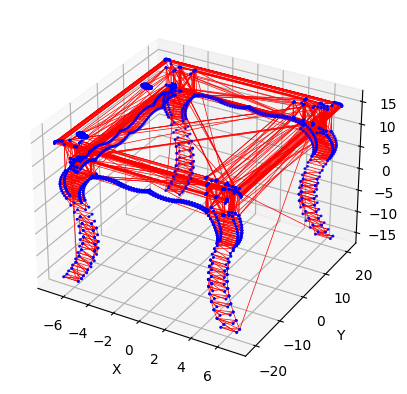

In [ ]:
def plot3d(points):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # get xyz coordinate data
  x = points[:, 0]
  y = points[:, 1]
  z = points[:, 2]

  # plot vertices
  ax.scatter(x, y, z, c='b', marker='o', s=1)  # c: 点的颜色，marker: 点的形状，s: 点的大小

  # plot line
  for i in range(points.shape[0]):
    ax.plot([x[i], x[(i + 1) % points.shape[0]]],
        [y[i], y[(i + 1) % points.shape[0]]],
        [z[i], z[(i + 1) % points.shape[0]]], c='r', linewidth=0.5)

  # set axis label
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  plt.show()

points, label = pointData[3]  
plot3d(points)

Try MLP

In [ ]:
class MLPClassifier(nn.Module):
  def __init__(self, input_dim, layers, num_classes=10):
    super(MLPClassifier, self).__init__()
    self.input_dim = input_dim
    self.layers = layers
    self.num_classes = num_classes
        
    # 定义MLP的层
    self.fc_layers = nn.ModuleList()
    prev_dim = input_dim
    for layer_dim in layers:
      self.fc_layers.append(nn.Linear(prev_dim, layer_dim))
      prev_dim = layer_dim
    self.output_layer = nn.Linear(prev_dim, num_classes) # 输出层

  def forward(self, x):
    for fc_layers in self.fc_layers:
      x = torch.relu(fc_layers(x))
    x = self.output_layer(x)
    return x

  

In [ ]:
for i in range(10):
  print(len(pointData[i]))
  print(pointData[i][0].shape)


2
(372, 3)
2
(34016, 3)
2
(885, 3)
2
(4205, 3)
2
(316, 3)
2
(496, 3)
2
(142, 3)
2
(674, 3)
2
(1167, 3)
2
(1143, 3)


Train MLP 

In [ ]:
loss = nn.CrossEntropyLoss()

optimizer = optim.SGD(MLPClassifier.parameters(), lr=0.001, momentum=0.9)


num_epochs = 100 
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch_idx, (points, labels) in enumerate(pointData):
        optimizer.zero_grad()
        outputs = MLPClassifier(points)
        loss = loss(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/(batch_idx+1):.4f}")

    # mlp.eval()
    # with torch.no_grad():
    #     # ... (使用验证集进行模型性能评估，例如计算准确率等指标)
    # mlp.train()

# 保存训练好的模型
# torch.save(mlp.state_dict(), 'mlp_model.pth')